In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
creditcard=pd.read_csv("Credit_card.csv")
creditcard.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
creditcard_label=pd.read_csv("Credit_card_label.csv")
creditcard_label.head(2)

,Ind_ID,label
0,5008827,1
1,5009744,1


**Merging the two datasets**

In [4]:
ccd=creditcard.merge(creditcard_label)
ccd.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
ccd.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


##### Label: 0 is application approved and 1 is application rejected. 

In [6]:
ccd.shape

(1548, 19)

The dataset contains 1548 observations with 19 features

In [7]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
ccd.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [9]:
ccd_missing=ccd.isna().sum()
ccd_missing

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

By observing the above info, we can say that there are some missing values in **gender, annual_income, birthday_count and type_occupation** columns

In [10]:
# Percentage of missing values

ccd_missing*100/len(ccd)

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

In [11]:
## Dropping duplicates if any

ccdata=ccd.drop_duplicates()
ccdata.shape

(1548, 19)

As the no of observations are same i.e. 1548, we can say that there are no duplicates available in the dataset.

In [12]:
ccdata.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,NaN,NaN,NaN,5078920.351421,41717.587742,5008827.0,5045069.75,5078841.5,5115673.0,5150412.0
GENDER,1541,2,F,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Owner,1548,2,N,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Propert_Owner,1548,2,Y,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILDREN,1548.0,NaN,NaN,NaN,0.412791,0.776691,0.0,0.0,0.0,1.0,14.0
Annual_income,1525.0,NaN,NaN,NaN,191399.32623,113252.997656,33750.0,121500.0,166500.0,225000.0,1575000.0
Type_Income,1548,4,Working,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,1548,5,Secondary / secondary special,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1548,5,Married,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing_type,1548,6,House / apartment,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import missingno as msno

**Visualizing the missing data **

<Axes: >

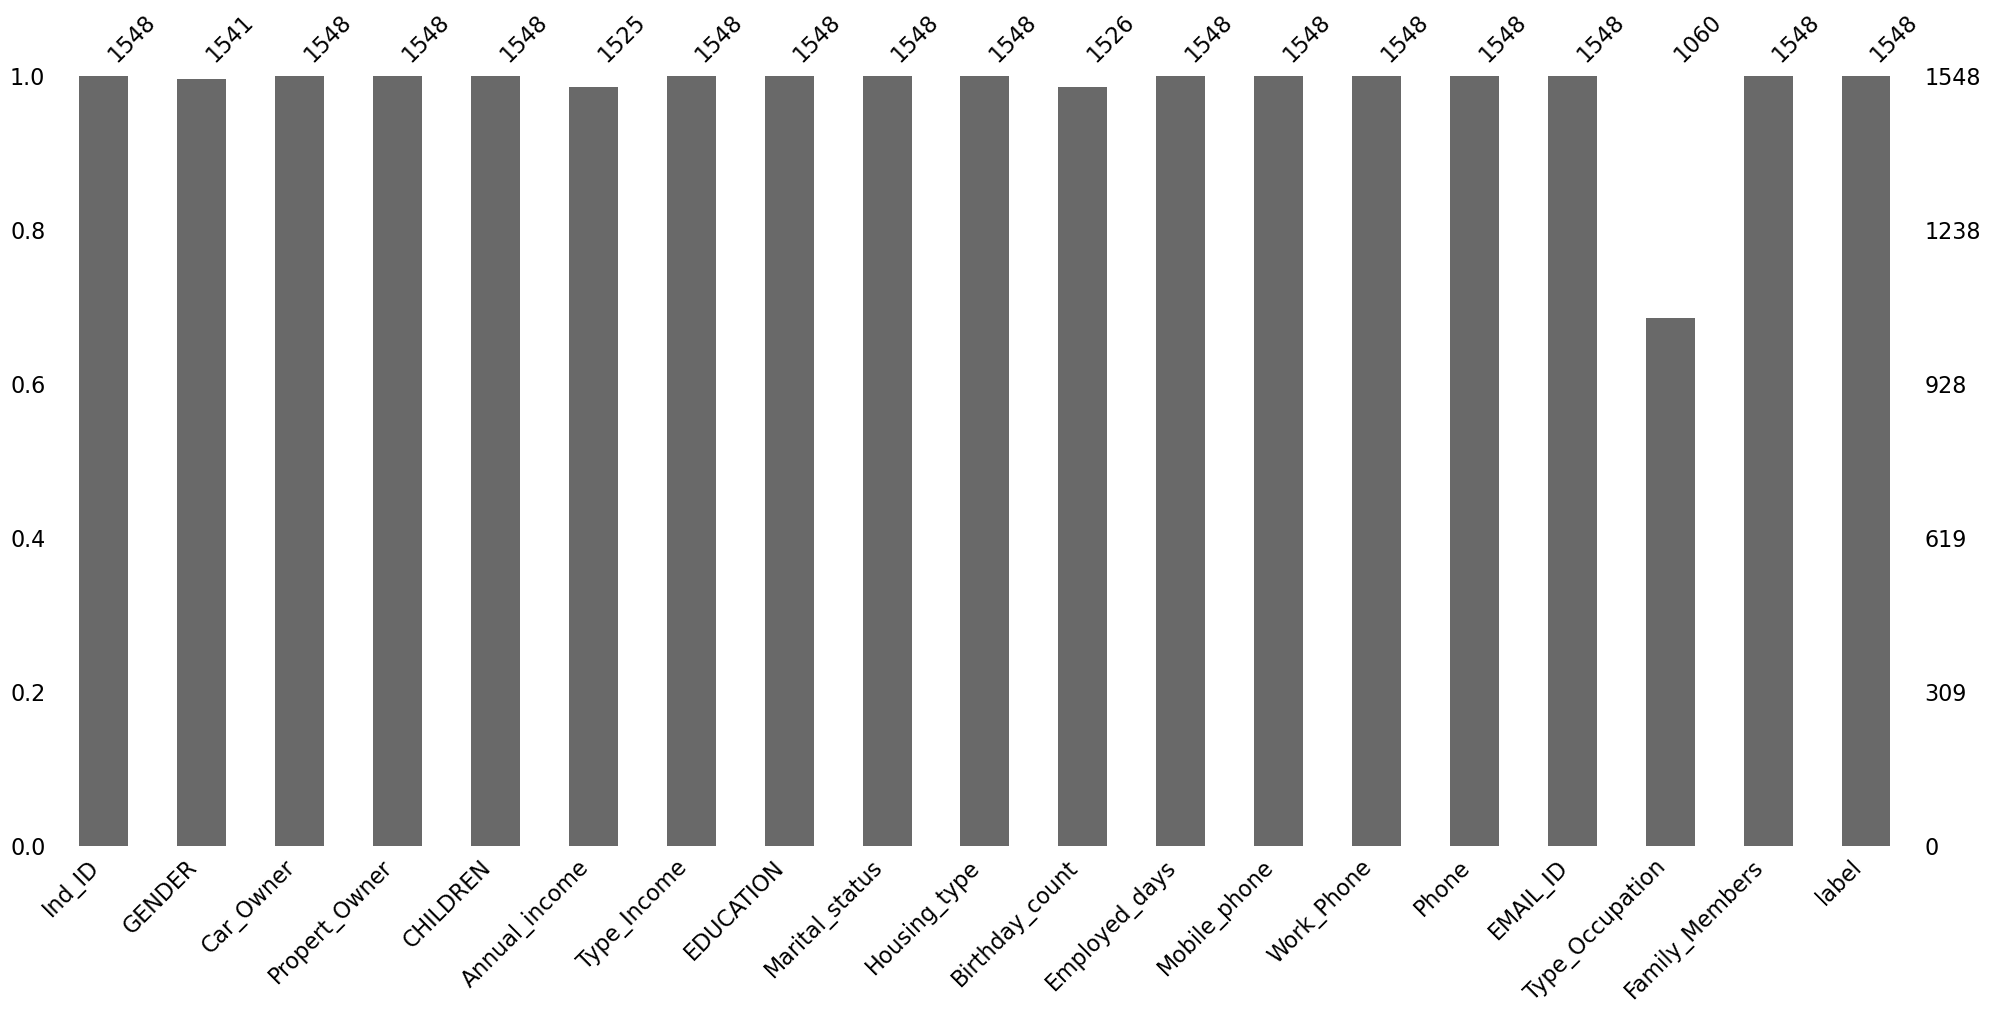

In [14]:
msno.bar(ccdata)

***Visualization***

In [15]:
sns.set_style(style='whitegrid')

In [16]:
ccdata_gender=ccdata.groupby(["GENDER"]).count()['Ind_ID']
ccdata_gender

GENDER
F    973
M    568
Name: Ind_ID, dtype: int64

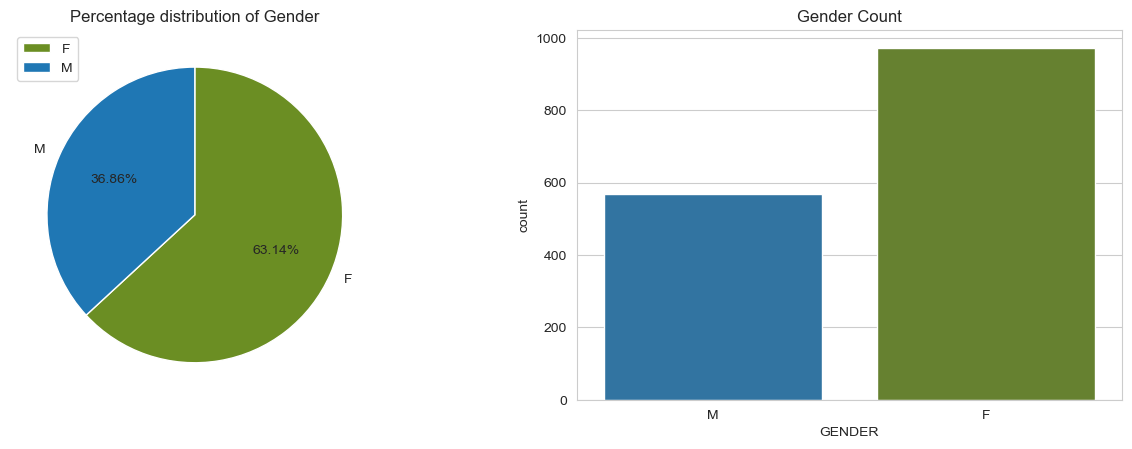

In [17]:
plt.subplot(1,2,1)
plt.pie(ccdata_gender, labels=ccdata_gender.index, autopct="%1.2f%%",startangle=90,counterclock=False, colors=["olivedrab", "tab:blue"])
plt.legend(loc="upper left")
plt.title("Percentage distribution of Gender")

plt.subplot(1,2,2)
sns.countplot(data=ccdata, x="GENDER", palette=["tab:blue","olivedrab",])
plt.title("Gender Count")

plt.subplots_adjust(right=2.0)

The number of females are more

In [18]:
ccdata["age"]=np.abs(ccdata["Birthday_count"])/365
ccdata.head(2)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,51.430137
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.142466


In [19]:
ccdata_copy=ccdata.copy()

In [20]:
# If employed days is positive that means user is unemployed
# and if employed days is negative, user is currently employed
# For unemployed  ----  1
# For Employed    ----  0

ccdata_copy["Employment_status"]=np.where(ccdata['Employed_days']<0, 0,1)
ccdata_copy.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,Employment_status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,51.430137,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,NaN,0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,0


In [21]:
ccdata_copy.groupby(["Employment_status"]).count()["Ind_ID"]

Employment_status
0    1287
1     261
Name: Ind_ID, dtype: int64

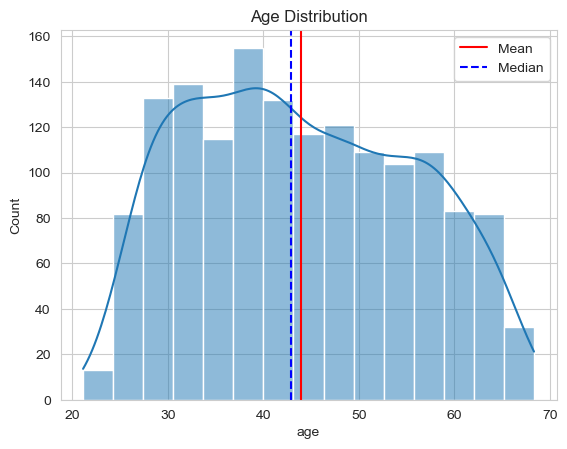

In [22]:
# Checking Age Distribution

# ccdata_copy['age']
sns.histplot(data=ccdata_copy,x="age", bins=15, kde=True)
plt.axvline(x=ccdata_copy.age.mean(),color="red",label="Mean")
plt.axvline(x=ccdata_copy.age.median(),color="blue",label="Median", ls="--")
plt.legend()
plt.title("Age Distribution")
plt.show()

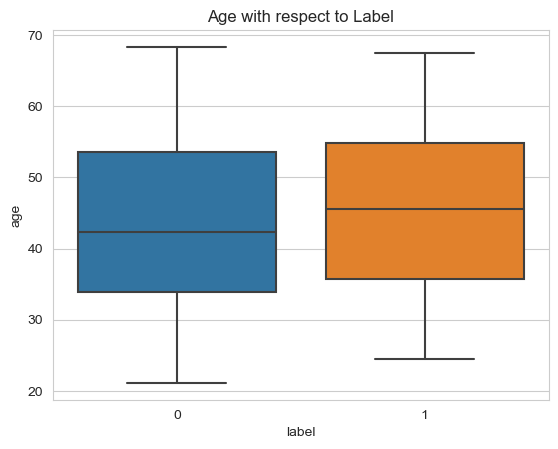

label
0    43.759341
1    45.407079
Name: age, dtype: float64

In [23]:
sns.boxplot(data=ccdata_copy,y="age",x="label")
plt.title("Age with respect to Label")
plt.show()
ccdata_copy.groupby(['label'])['age'].mean()

In [24]:
marital_status_count=ccdata_copy.Marital_status.value_counts()
marital_status_count

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

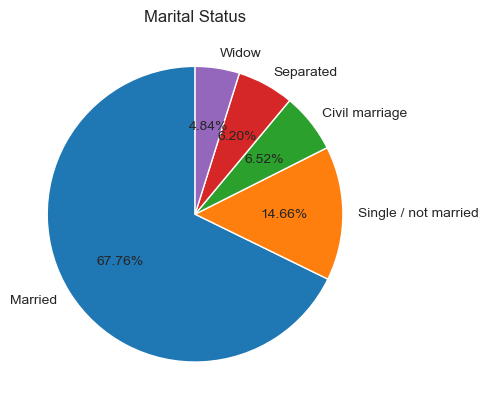

In [25]:
plt.pie(marital_status_count.values, labels=marital_status_count.index, autopct="%1.2f%%",startangle=90)
plt.title("Marital Status")
plt.show()

Most applicants are married

In [26]:
house_type=ccdata_copy['Housing_type'].value_counts()
house_type

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

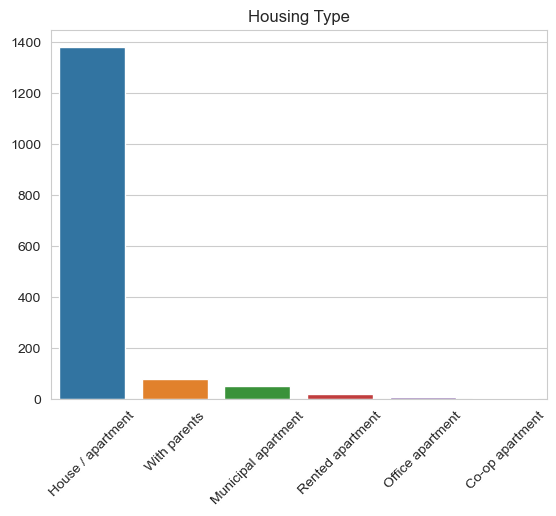

In [27]:
sns.barplot(data=ccdata_copy, x=house_type.index,y=house_type.values)
plt.xticks(rotation=45)
plt.title("Housing Type")
plt.show()

So majority are living in House/apartment

In [28]:
edu_type=ccdata_copy["EDUCATION"].value_counts()
edu_type

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

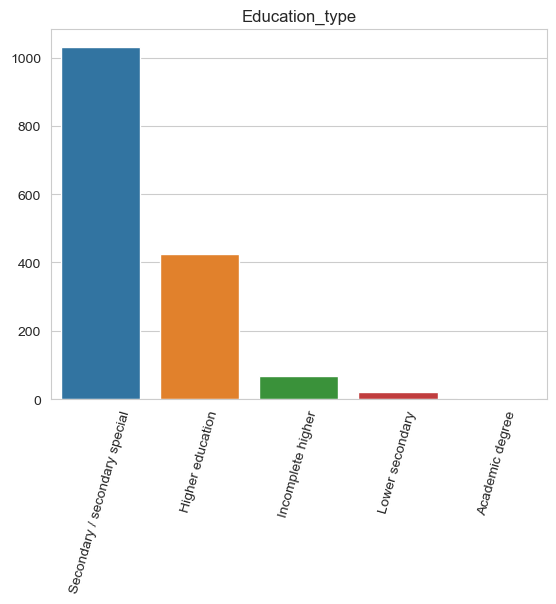

In [29]:
sns.barplot(data=ccdata_copy, x=edu_type.index,y=edu_type.values)
plt.title("Education_type")
plt.xticks(rotation=74)
plt.show()


Majority of applicants have done Secondary/Secondary special

In [30]:
family_mem_count=ccdata_copy["Family_Members"].value_counts()
family_mem_count

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64

In [31]:
children_count=ccdata_copy["CHILDREN"].value_counts()
children_count

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

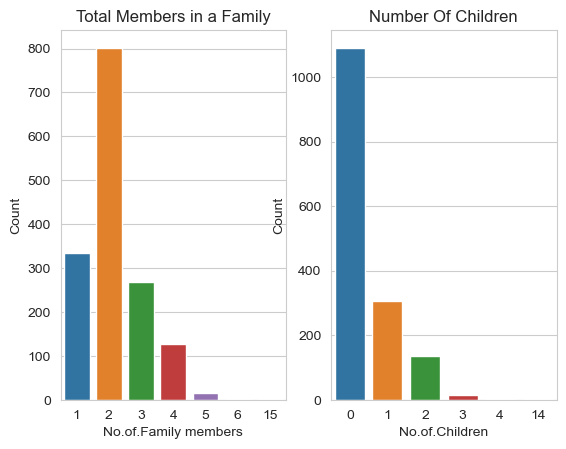

<Figure size 640x480 with 0 Axes>

In [32]:
plt.subplot(1,2,1)
sns.barplot(data=ccdata_copy, x=family_mem_count.index, y=family_mem_count.values)
plt.xlabel("No.of.Family members")
plt.ylabel("Count")
plt.title("Total Members in a Family")

plt.subplot(1,2,2)
sns.barplot(data=ccdata_copy, x=children_count.index, y=children_count.values)
plt.xlabel("No.of.Children")
plt.ylabel("Count")
plt.title("Number Of Children")
plt.show()

plt.subplots_adjust(right=8.7)

The dataset contains a majority of two members in their household with no children

In [33]:
income_type=ccdata_copy.Type_Income.value_counts()
income_type

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

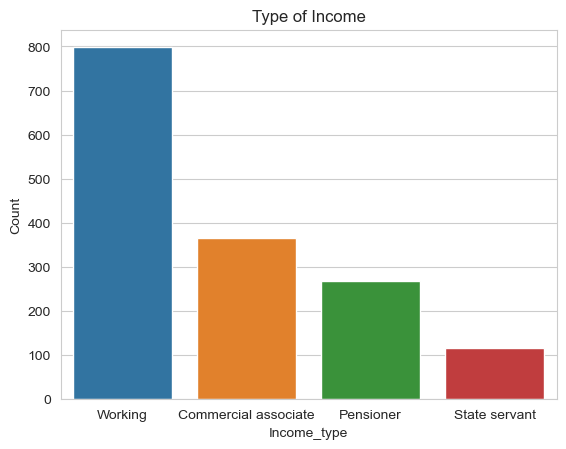

In [34]:
sns.barplot(data=ccdata_copy, x=income_type.index, y=income_type.values)
plt.title("Type of Income")
plt.xlabel("Income_type")
plt.ylabel("Count")
plt.show()

In [35]:
occupation_type=ccdata_copy["Type_Occupation"].value_counts()
occupation_type

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

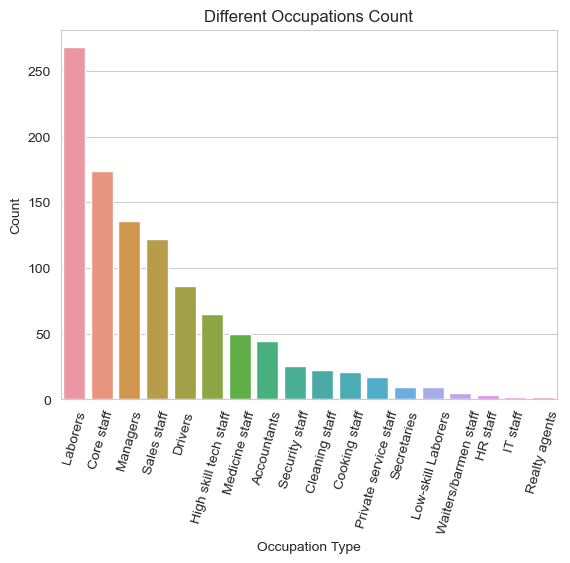

In [36]:
sns.barplot(data=ccdata_copy, x=occupation_type.index, y=occupation_type.values)
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Different Occupations Count")
plt.xticks(rotation=74)
plt.show()

Majority of the applicants are Laborers

In [37]:
ccdata_emp=ccdata_copy.copy()

In [38]:
# Creating a new column emp_yrs

ccdata_emp["working_yrs"]=np.where(ccdata_emp["Employed_days"]>0,0,(np.abs(ccdata_emp["Employed_days"])/365))

In [39]:
ccdata_emp.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,Employment_status,working_yrs
1421,5145970,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,1,0,0,0,NaN,1,0,63.063014,1,0.000000
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,1,0,Cooking staff,2,1,51.917808,0,2.745205
312,5069399,M,N,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,1,1,1,0,Core staff,1,0,23.002740,0,4.134247
400,5029108,M,Y,N,1,315000.0,State servant,Secondary / secondary special,Married,House / apartment,...,1,0,0,1,High skill tech staff,3,0,36.246575,0,9.980822
994,5021737,F,N,Y,0,189000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,1,0,0,0,NaN,1,0,57.145205,1,0.000000


In [40]:
ccdata_emp["working_yrs"].describe()

count    1548.000000
mean        6.073914
std         6.584342
min         0.000000
25%         1.182877
50%         4.287671
75%         8.697260
max        40.786301
Name: working_yrs, dtype: float64

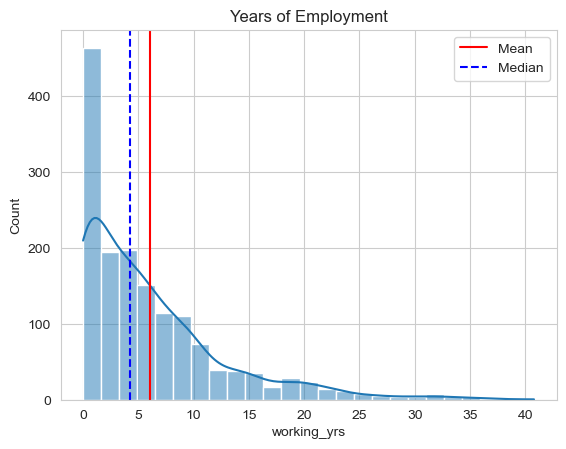

In [41]:
sns.histplot(data=ccdata_emp,x="working_yrs", bins=25, kde=True)
plt.axvline(x=ccdata_emp.working_yrs.mean(),color="red",label="Mean")
plt.axvline(x=ccdata_emp.working_yrs.median(),color="blue",label="Median", ls="--")
plt.legend()
plt.title("Years of Employment")
plt.show()

Average no of working years is around 6 years
The data is positively skewed and we also have working years greater than 30

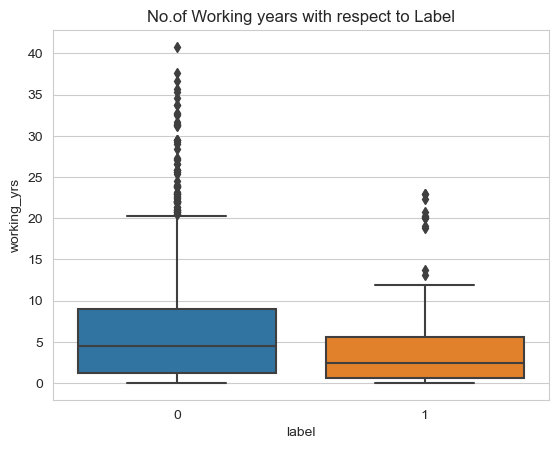

In [42]:
sns.boxplot(data=ccdata_emp, x="label",y="working_yrs")
plt.title("No.of Working years with respect to Label")
plt.show()

In [43]:
ccdata_emp.groupby(['label'])['working_yrs'].mean()

label
0    6.301891
1    4.285276
Name: working_yrs, dtype: float64

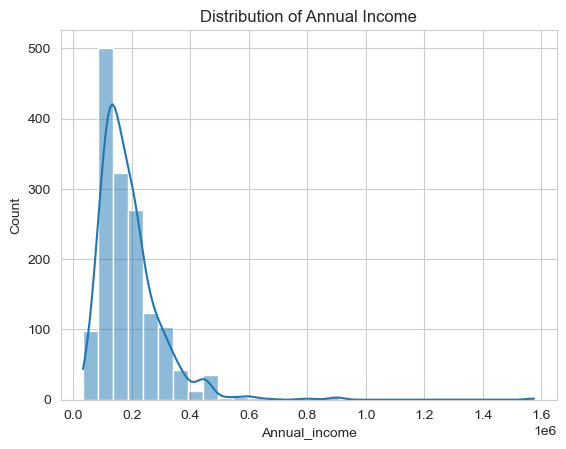

In [44]:
sns.histplot(data=ccdata_emp, x=ccdata_emp["Annual_income"], kde=True, bins=30)
plt.title("Distribution of Annual Income")
plt.show()

Annual_income has right-skewed data

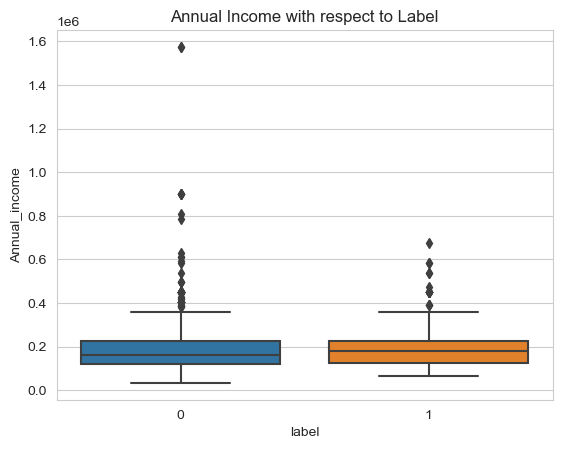

In [45]:
sns.boxplot(data=ccdata_emp, x="label",y='Annual_income')
plt.title("Annual Income with respect to Label")
plt.show()

In [46]:
ccdata_emp.groupby(['label']).Annual_income.mean()

label
0    190309.258100
1    200263.473054
Name: Annual_income, dtype: float64

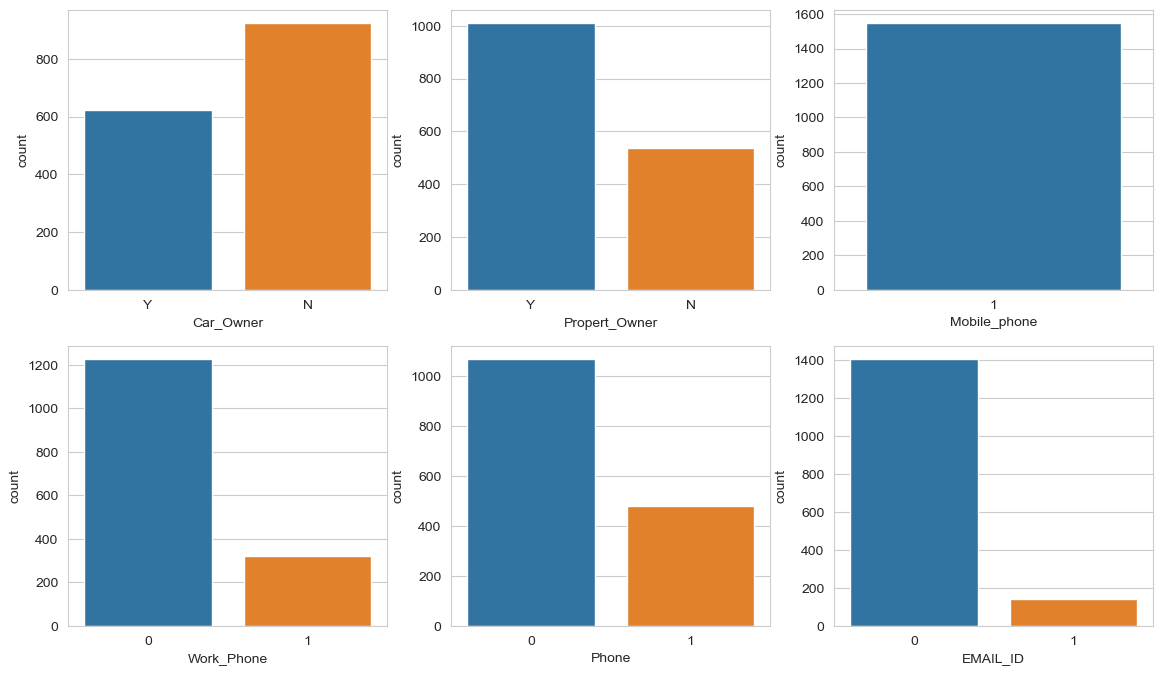

In [47]:
fig, ax = plt.subplots(2,3,figsize= (14,8))
sns.countplot(data=ccdata_emp, x='Car_Owner', ax=ax[0,0])
sns.countplot(data=ccdata_emp,x='Propert_Owner', ax=ax[0,1])
sns.countplot(data=ccdata_emp,x='Mobile_phone', ax=ax[0,2])
sns.countplot(data=ccdata_emp,x='Work_Phone', ax=ax[1,0])
sns.countplot(data=ccdata_emp,x='Phone', ax=ax[1,1])
sns.countplot(data=ccdata_emp,x='EMAIL_ID', ax=ax[1,2])
fig.show()


In [48]:
cc_status=ccdata_emp['label'].value_counts()
cc_status

0    1373
1     175
Name: label, dtype: int64

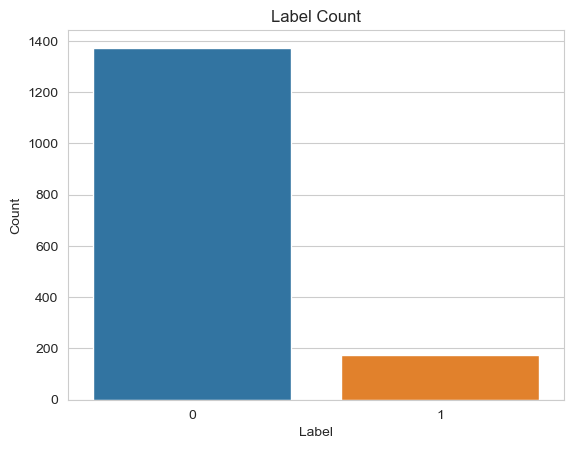

In [49]:
sns.barplot(data=ccdata_emp, x=cc_status.index,y=cc_status.values)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Count")
plt.show()

So we have imbalanced data as there is a huge difference between approved and rejected

In [50]:
ccdata_emp.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,Employment_status,working_yrs
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,1,0,0,0,NaN,2,1,51.430137,1,0.000000
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,NaN,2,1,37.142466,0,1.605479


In [51]:
ccdata_emp.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label', 'age', 'Employment_status', 'working_yrs'],
      dtype='object')

In [52]:
ccdata_emp_numcol=ccdata_emp[['CHILDREN','Family_Members','Annual_income','age','working_yrs']]
ccdata_emp_catfea=[fea for fea in ccdata_emp.columns if fea not in ccdata_emp_numcol]

<Figure size 700x700 with 0 Axes>

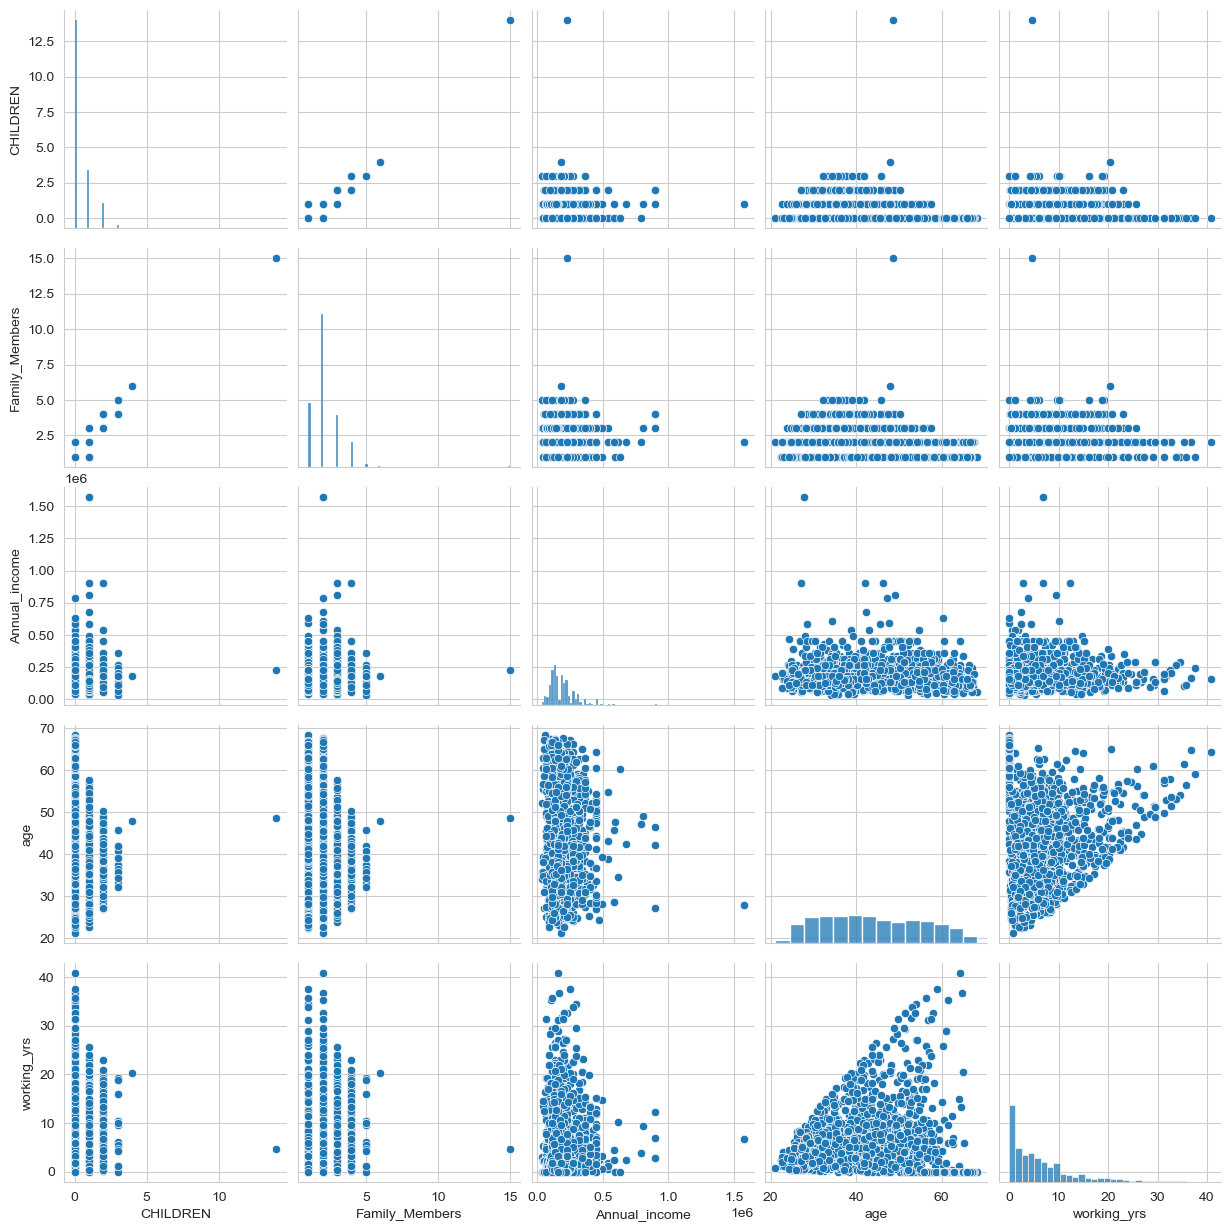

In [53]:
plt.figure(figsize=(7,7))
sns.pairplot(data=ccdata_emp_numcol)
plt.show()

*  Chidren and Family_member have linear correlation that means more members in a family accounts to more number of children. So to avoid multi-colinearity, one of the feature must be removed.

*   With respect to age, number of working hours increases



In [54]:
# Removing unnecessary columns like Ind_ID, Birthday_count, Employed_days,Employment_status

ccdata_emp_corr=ccdata_emp.drop(['Birthday_count','Employed_days','Employment_status','Ind_ID','Mobile_phone'],axis=1)

ccdata_emp_corr.corr()

,CHILDREN,Annual_income,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,working_yrs
CHILDREN,1.000000,0.078497,0.035014,-0.004908,0.025776,0.890248,-0.021646,-0.279716,0.074335
Annual_income,0.078497,1.000000,-0.071171,-0.006439,0.122320,0.050957,0.027456,-0.111638,0.050117
Work_Phone,0.035014,-0.071171,1.000000,0.352439,-0.009594,0.072228,-0.007046,-0.174687,0.120256
Phone,-0.004908,-0.006439,0.352439,1.000000,0.018105,0.005372,-0.000664,0.029215,0.033313
EMAIL_ID,0.025776,0.122320,-0.009594,0.018105,1.000000,0.035098,0.012921,-0.166749,-0.039103
Family_Members,0.890248,0.050957,0.072228,0.005372,0.035098,1.000000,-0.030709,-0.266527,0.093467
label,-0.021646,0.027456,-0.007046,-0.000664,0.012921,-0.030709,1.000000,0.045097,-0.097014
age,-0.279716,-0.111638,-0.174687,0.029215,-0.166749,-0.266527,0.045097,1.000000,-0.025740
working_yrs,0.074335,0.050117,0.120256,0.033313,-0.039103,0.093467,-0.097014,-0.025740,1.000000


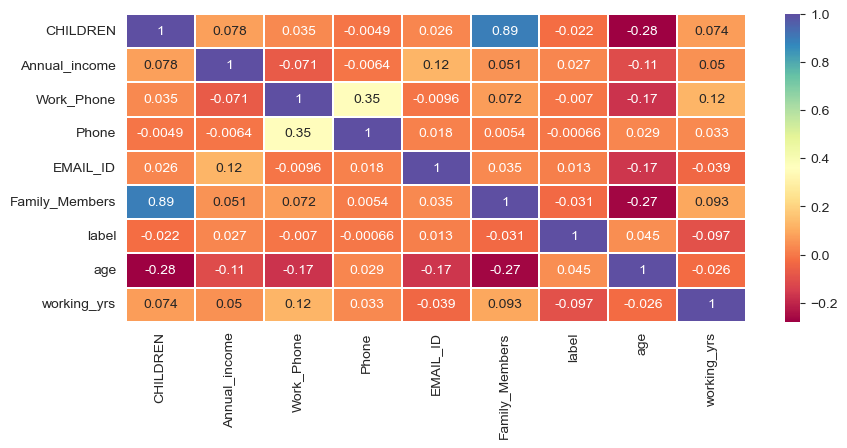

In [55]:
plt.figure(figsize=(10,4))
sns.heatmap(ccdata_emp_corr.corr(),cmap='Spectral', annot=True,linewidth=1.3)
plt.show()

#####  Visualizing Age with other categorical features

In [56]:
ccdata_emp.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label', 'age', 'Employment_status', 'working_yrs'],
      dtype='object')

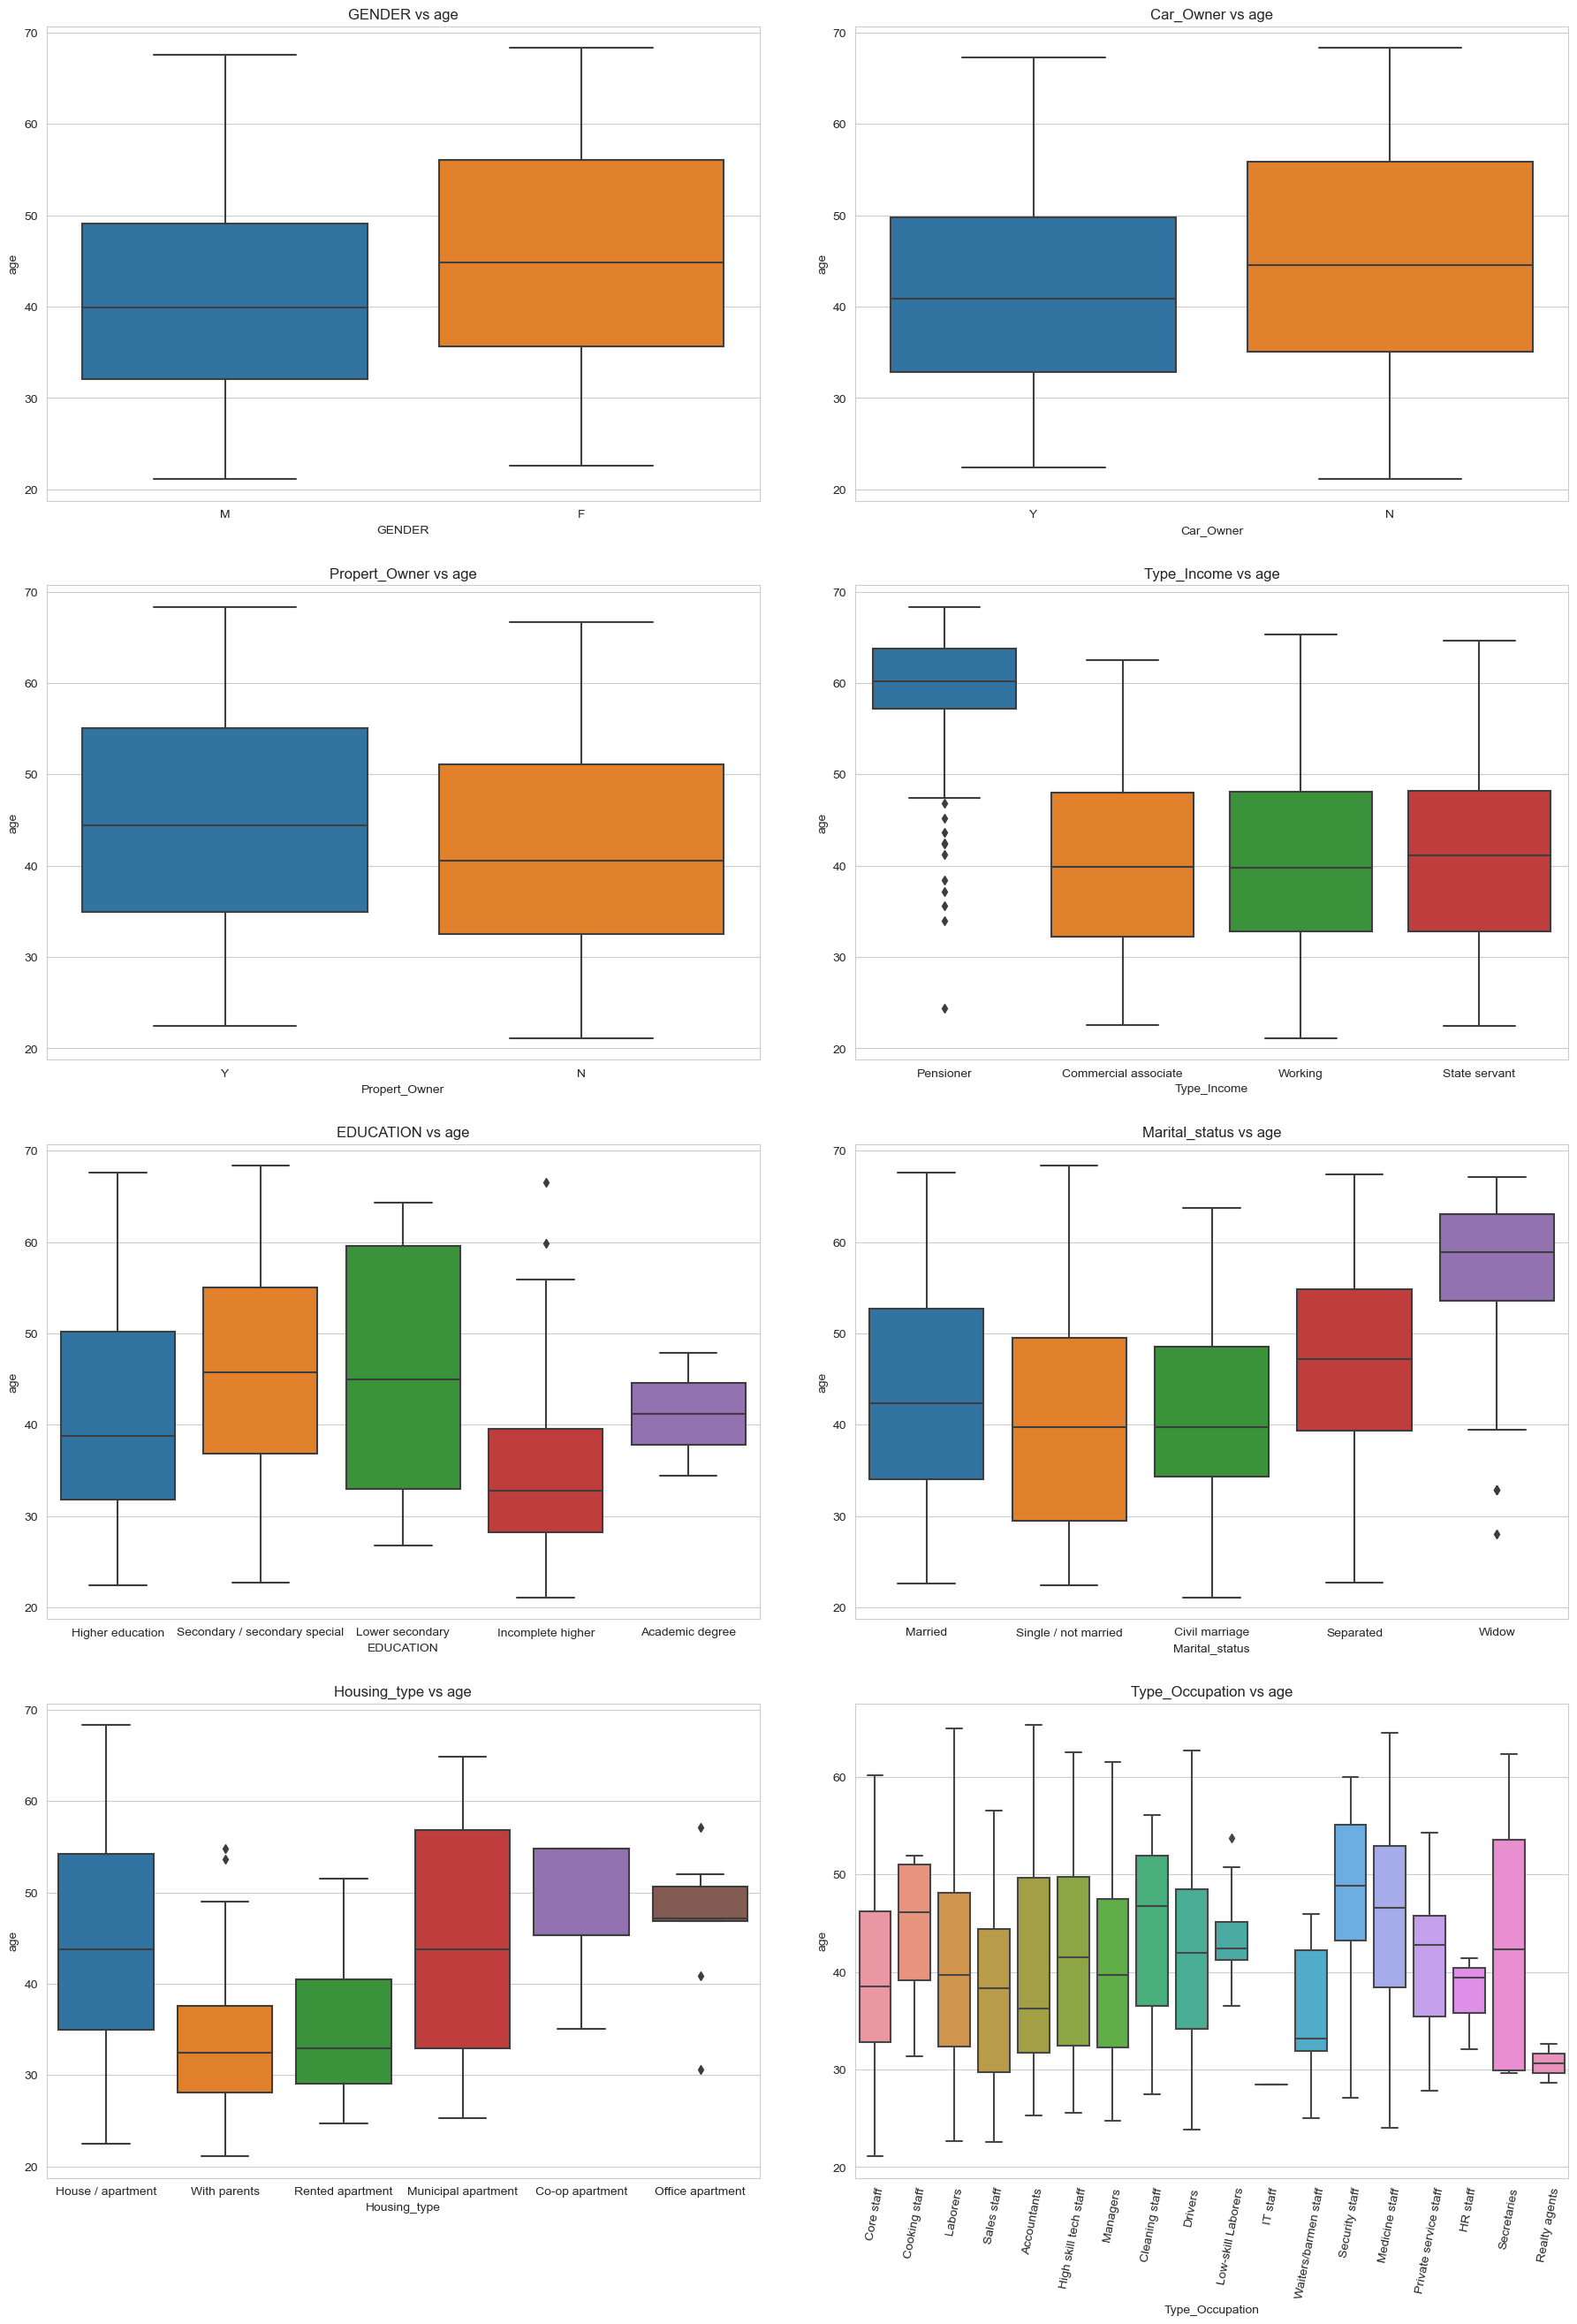

In [57]:
cat_fea=['GENDER', 'Car_Owner', 'Propert_Owner','Type_Income', 'EDUCATION', 'Marital_status','Housing_type','Type_Occupation']
fig,axes=plt.subplots(4,2,figsize=(19,26))
fig.tight_layout(pad=5.0)
for i in range(0,len(cat_fea)):
    for m in range(4):
        for n in range(2):
            sns.boxplot(data=ccdata_emp,x=cat_fea[i],y='age',ax=axes[m,n])
            plt.xticks(rotation=79)
            axes[m,n].set_title(cat_fea[i] + ' ' + "vs age")
            i+=1
    break
    
    

* The age of female is more than male
* The applicants without car tends to be older
* Those who owned property tends to be older than those who do no have property
* The applicants who are taking pensions are older than others and also there are people who are taking pensions at younger ages(may be these can be considered as outliers)
* The applicants who are widowed are older than others and also there are some people who are widowed at <35 years 
* Age of applicants who are living with parents are younger and also it was observed that there are some people who are living with parents at age >55 (may be considered as outliers)
* Age of Realty agents is less than people with types of occupation

##### Visualizing Annual_income with other categorical features

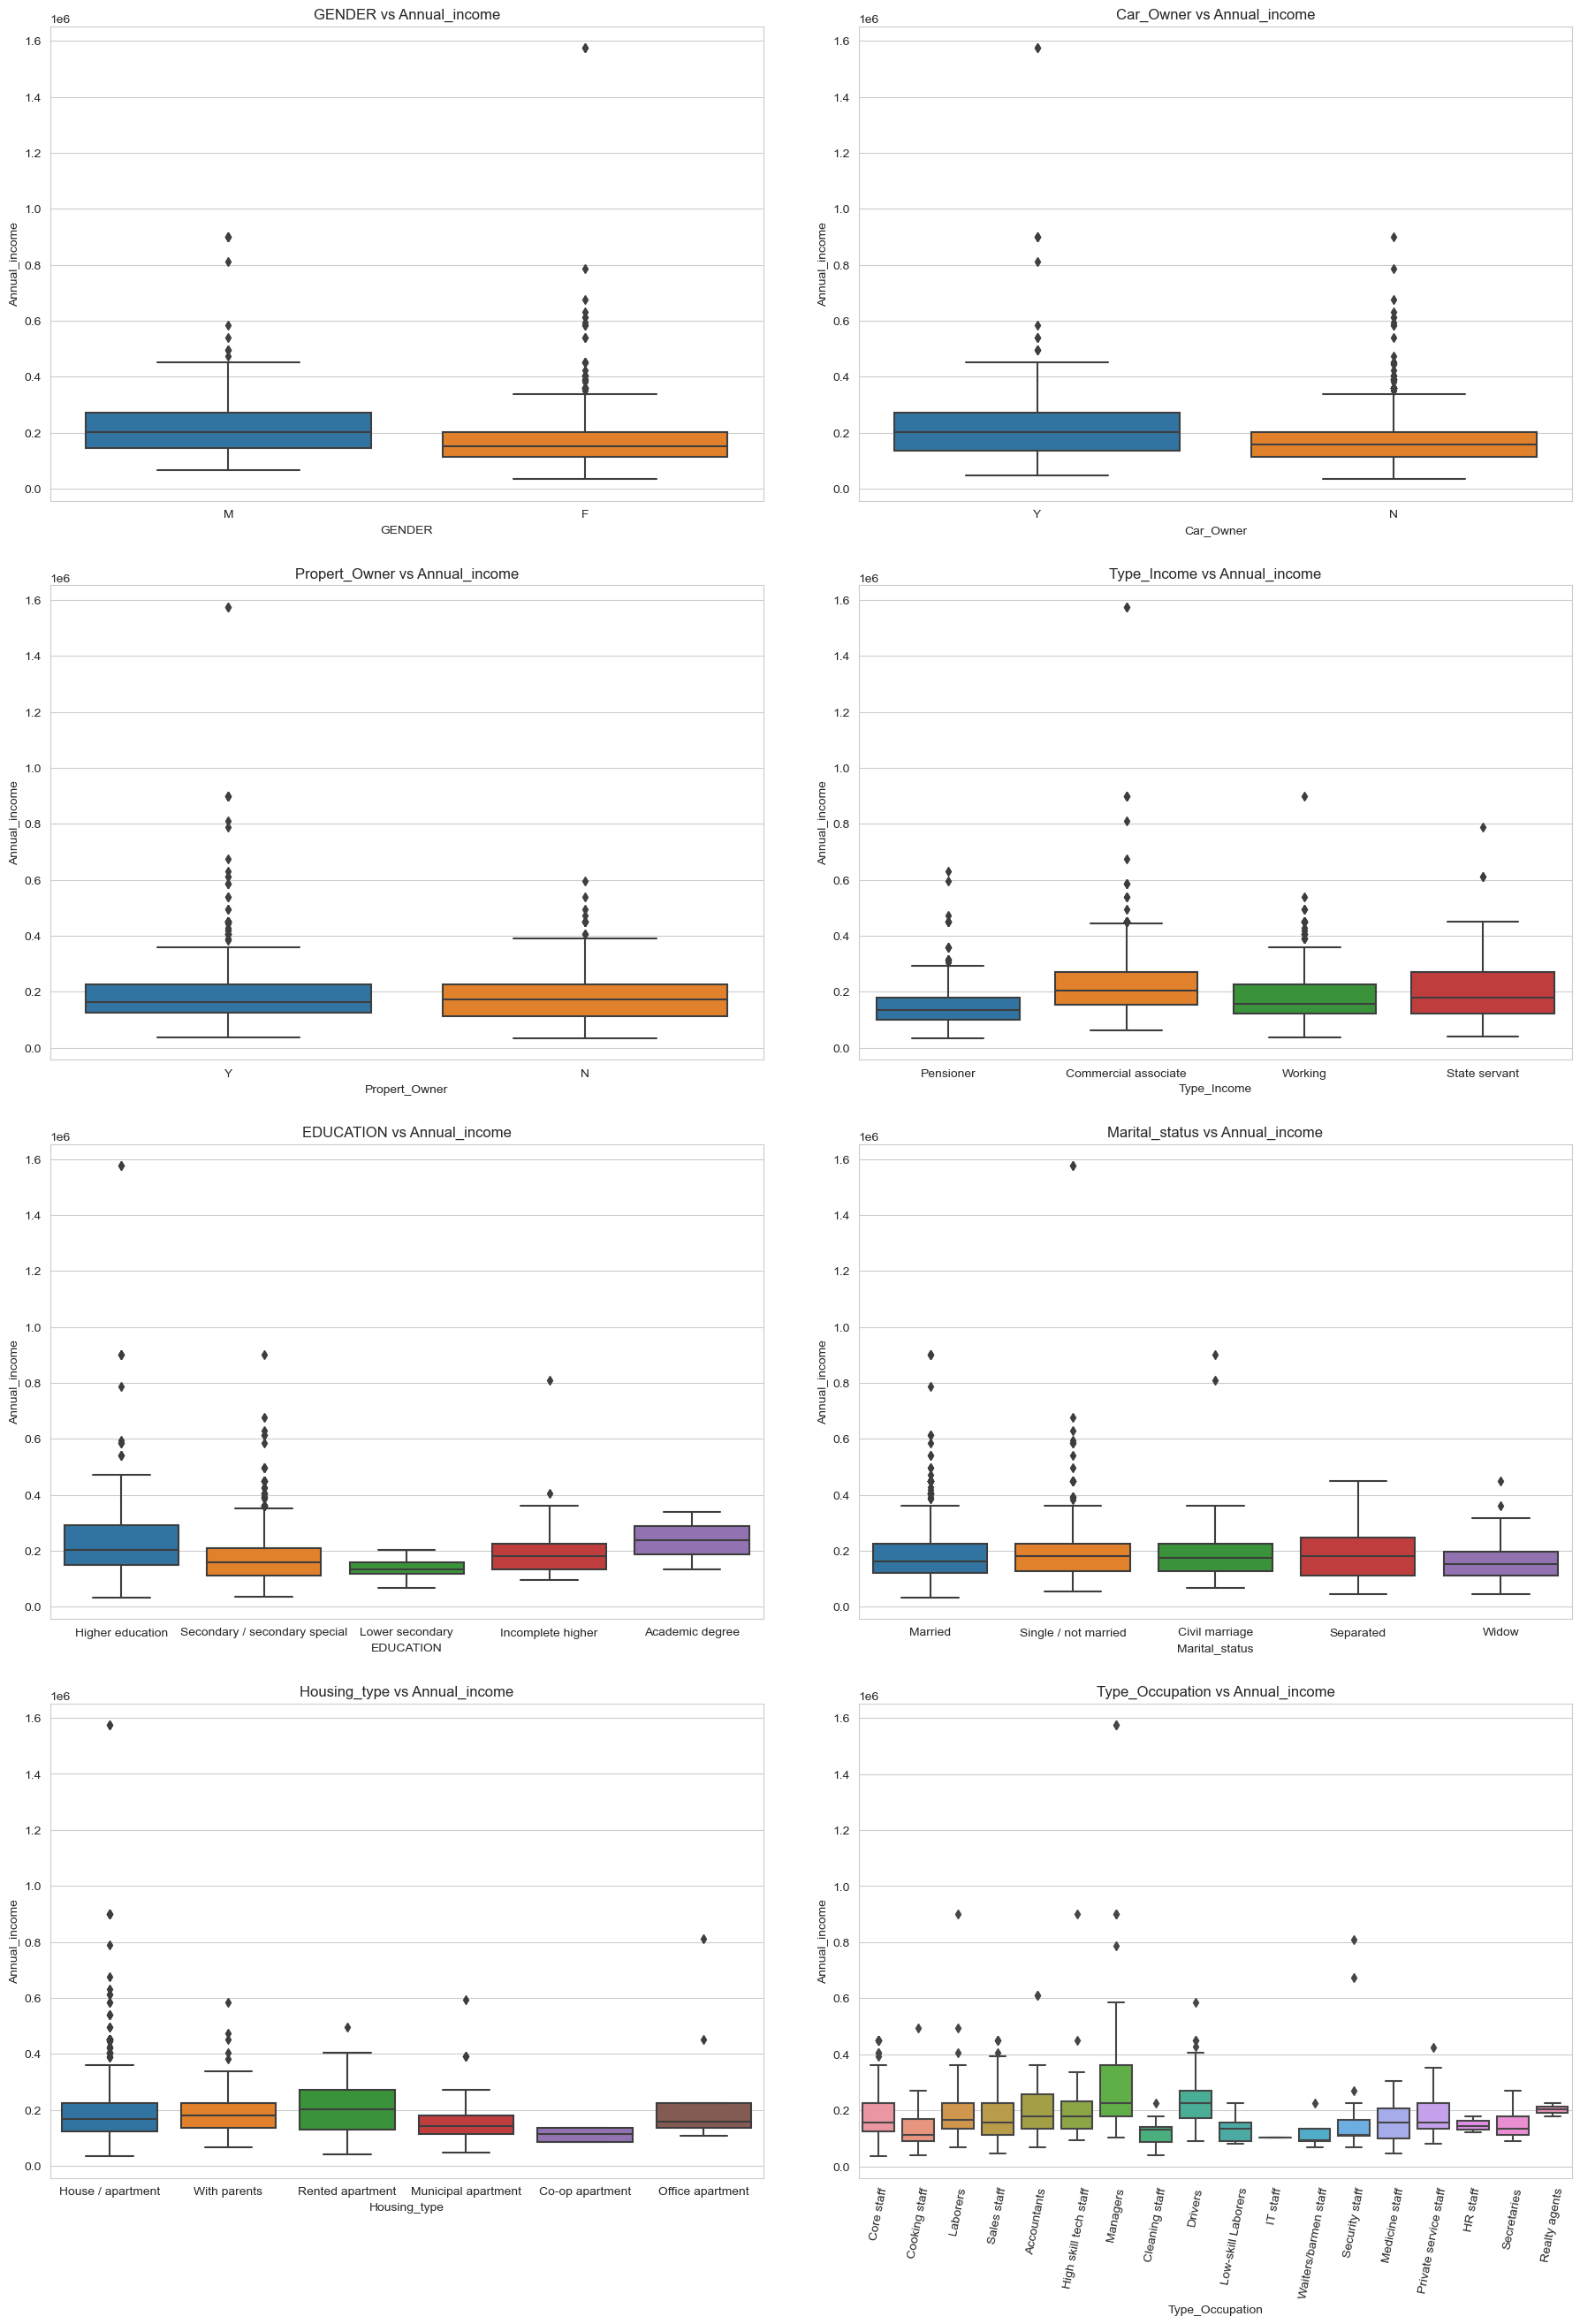

In [58]:
cat_fea=['GENDER', 'Car_Owner', 'Propert_Owner','Type_Income', 'EDUCATION', 'Marital_status','Housing_type','Type_Occupation']
fig,axes=plt.subplots(4,2,figsize=(19,26))
fig.tight_layout(pad=5.0)
for i in range(0,len(cat_fea)):
    for m in range(4):
        for n in range(2):
            sns.boxplot(data=ccdata_emp,x=cat_fea[i],y='Annual_income',ax=axes[m,n])
            plt.xticks(rotation=79)
            axes[m,n].set_title(cat_fea[i] + ' ' + "vs Annual_income")
            i+=1
    break

* The income of male is greater than female
* Commercial associates earning more income than others
* The applicants with academic degree earning more income
* Managers are earning more income 

##### Data Cleaning

In [59]:
# Dropping unnecessary columns

pd.set_option('display.max_columns',None)
ccdata_emp.head(3)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,Employment_status,working_yrs
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,51.430137,1,0.000000
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.142466,0,1.605479
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,NaN,0,1.605479


In [60]:
ccdata_new=ccdata_emp.drop(columns=['Ind_ID','Birthday_count', 'Employed_days','Employment_status'])

In [61]:
ccdata_new.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.430137,0.000000
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,1.605479


We have missing values in gender,annual_income, age, occupation_type 

In [62]:
age_missing=ccdata_new[ccdata_new['age'].isna()==True]
age_missing

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,1.605479
70,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,1,0,0,0,Sales staff,1,1,NaN,1.391781
205,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,0,NaN,1.597260
388,M,Y,Y,1,495000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Managers,3,0,NaN,3.260274
473,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,0,NaN,18.926027
503,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2,0,NaN,5.621918
539,M,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,0,NaN,6.235616
584,M,Y,N,2,112500.0,Working,Higher education,Married,House / apartment,1,1,1,0,High skill tech staff,4,0,NaN,18.336986
626,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,0,NaN,8.106849
689,F,N,N,0,94500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,0,NaN,0.000000


Imputing missing values of age based on occupation_type

In [63]:
type_income_mean_age=ccdata_new.groupby(['Type_Income'])['age'].mean()
type_income_mean_age

Type_Income
Commercial associate    40.219428
Pensioner               59.439648
State servant           41.490269
Working                 40.789276
Name: age, dtype: float64

In [64]:
for idx,fea in age_missing.iterrows():
    if fea['Type_Income']=='Pensioner':
        age_missing.loc[idx,'age']=type_income_mean_age['Pensioner']
        

In [65]:
type_occupation_mean_age=ccdata_emp.groupby(['Type_Occupation'])['age'].mean()
type_occupation_mean_age

Type_Occupation
Accountants              40.312711
Cleaning staff           44.774346
Cooking staff            44.713633
Core staff               39.652244
Drivers                  41.196814
HR staff                 37.641096
High skill tech staff    41.551841
IT staff                 28.482192
Laborers                 40.565055
Low-skill Laborers       43.633486
Managers                 40.057350
Medicine staff           44.929774
Private service staff    40.808048
Realty agents            30.641096
Sales staff              38.272169
Secretaries              43.551903
Security staff           47.728110
Waiters/barmen staff     35.631781
Name: age, dtype: float64

In [66]:
for i in age_missing.index:
    for type_occ_idx in type_occupation_mean_age.index:
        if age_missing.loc[i,'Type_Occupation']==type_occ_idx:
            age_missing.loc[i,'age']=type_occupation_mean_age[type_occ_idx]
        else:
            for j in type_income_mean_age.index:
                if age_missing.loc[i,'Type_Income']==j:
                    age_missing.loc[i,'age']=type_income_mean_age[j]

In [67]:
age_missing

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,40.219428,1.605479
70,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,1,0,0,0,Sales staff,1,1,40.789276,1.391781
205,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,0,40.789276,1.597260
388,M,Y,Y,1,495000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Managers,3,0,40.219428,3.260274
473,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,0,40.789276,18.926027
503,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2,0,40.789276,5.621918
539,M,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,0,40.789276,6.235616
584,M,Y,N,2,112500.0,Working,Higher education,Married,House / apartment,1,1,1,0,High skill tech staff,4,0,40.789276,18.336986
626,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,0,40.789276,8.106849
689,F,N,N,0,94500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,0,59.439648,0.000000


In [68]:
ccdata_new[ccdata_new['age'].isna()==True]=age_missing

In [69]:
ccdata_new

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.430137,0.000000
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,40.219428,1.605479
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,0,32.758904,5.978082
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,0,28.024658,3.312329
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,36.093151,6.786301
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,0,41.895890,1.767123


In [70]:
ccdata_new.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
age                  0
working_yrs          0
dtype: int64

In [71]:
annual_income_missing=ccdata_new[ccdata_new['Annual_income'].isna()==True]
annual_income_missing

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
12,F,Y,Y,0,NaN,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,51.917808,2.745205
27,F,N,Y,0,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,1,59.813699,0.000000
65,F,N,Y,0,NaN,Pensioner,Higher education,Separated,House / apartment,1,0,0,0,NaN,1,1,67.427397,0.000000
76,M,N,Y,1,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,2,1,35.471233,0.375342
107,M,Y,N,0,NaN,Commercial associate,Higher education,Single / not married,Municipal apartment,1,0,1,1,High skill tech staff,1,1,31.583562,1.660274
125,F,N,Y,0,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,1,62.068493,0.000000
152,M,Y,Y,2,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Managers,4,1,48.879452,11.794521
185,F,Y,Y,1,NaN,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,3,0,38.964384,0.386301
215,F,N,Y,0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,2,0,52.904110,4.046575


In [72]:
ccdata_new['Annual_income'].mean()

191399.3262295082

Imputing missing values of Annual_Income based on respective Type_Income

In [73]:
mean_ann_inc_bytype=ccdata_new.groupby(['Type_Income'])['Annual_income'].mean()
mean_ann_inc_bytype

Type_Income
Commercial associate    234600.000000
Pensioner               155175.096226
State servant           211422.413793
Working                 181048.757306
Name: Annual_income, dtype: float64

In [74]:
for i in annual_income_missing.index:
    for j in mean_ann_inc_bytype.index:
        if annual_income_missing.loc[i,'Type_Income']==j:
            annual_income_missing.loc[i,'Annual_income']=mean_ann_inc_bytype[j]
        

In [75]:
annual_income_missing

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
3,F,Y,N,0,234600.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
12,F,Y,Y,0,181048.757306,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,51.917808,2.745205
27,F,N,Y,0,155175.096226,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,1,59.813699,0.000000
65,F,N,Y,0,155175.096226,Pensioner,Higher education,Separated,House / apartment,1,0,0,0,NaN,1,1,67.427397,0.000000
76,M,N,Y,1,181048.757306,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,2,1,35.471233,0.375342
107,M,Y,N,0,234600.000000,Commercial associate,Higher education,Single / not married,Municipal apartment,1,0,1,1,High skill tech staff,1,1,31.583562,1.660274
125,F,N,Y,0,155175.096226,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,1,62.068493,0.000000
152,M,Y,Y,2,234600.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Managers,4,1,48.879452,11.794521
185,F,Y,Y,1,181048.757306,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,3,0,38.964384,0.386301
215,F,N,Y,0,234600.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,2,0,52.904110,4.046575


In [76]:
ccdata_new[ccdata_new['Annual_income'].isna()==True]=annual_income_missing

In [77]:
ccdata_new.isnull().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
age                  0
working_yrs          0
dtype: int64

In [78]:
gender_missing=ccdata_new[ccdata_new['GENDER'].isna()==True]
gender_missing

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
28,NaN,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,High skill tech staff,2,1,30.441096,9.178082
82,NaN,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,1,0,0,0,Core staff,1,1,52.890411,5.219178
143,NaN,N,N,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,1,58.202740,0.000000
171,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,1,Core staff,3,1,26.978082,1.375342
188,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,0,Managers,3,0,41.219178,12.838356
240,NaN,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,1,0,1,0,Sales staff,1,0,29.263014,5.895890


In [79]:
for i in gender_missing.index:
    gender_missing.loc[i,'GENDER']='F'

In [80]:
gender_missing

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,working_yrs
5,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
28,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,High skill tech staff,2,1,30.441096,9.178082
82,F,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,1,0,0,0,Core staff,1,1,52.890411,5.219178
143,F,N,N,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,1,58.202740,0.000000
171,F,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,1,Core staff,3,1,26.978082,1.375342
188,F,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,0,Managers,3,0,41.219178,12.838356
240,F,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,1,0,1,0,Sales staff,1,0,29.263014,5.895890


In [81]:
ccdata_new[ccdata_new['GENDER'].isna()==True]=gender_missing

In [82]:
ccdata_new['Type_Occupation'].isna().sum()

488

In [83]:
# Dropping the Type_occupation column

ccdata_no_msng=ccdata_new.drop(columns=['Type_Occupation'], axis=1)

In [84]:
ccdata_no_msng.rename(columns={'GENDER':'Gender','Propert_Owner':'Property_owner','CHILDREN':'Children','EDUCATION':'Education',
                           'Type_Income':'Income_type','EMAIL_ID':'Email_id','label':'Status'},inplace=True )

In [85]:
ccdata_no_msng.head()

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,Status,age,working_yrs
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,1,51.430137,0.000000
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.605479
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,40.219428,1.605479
3,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.605479
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.605479


##### Handling Outliers

In [86]:
ccdata_outliers=ccdata_no_msng.copy()

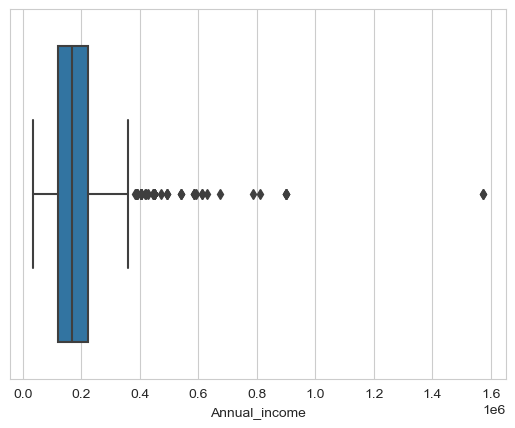

In [87]:
# Box plot of Annual_income

sns.boxplot(data=ccdata_outliers, x='Annual_income')
plt.show()

In [88]:
ccdata_outliers['Annual_income'].shape

(1548,)

In [89]:
Q1=np.percentile(ccdata_outliers['Annual_income'],25,interpolation='midpoint')
Q2=np.percentile(ccdata_outliers['Annual_income'],50,interpolation='midpoint')
Q3=np.percentile(ccdata_outliers['Annual_income'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [90]:
up_limit

380250.0

In [91]:
upper_limit_indx=np.where(ccdata_outliers['Annual_income']>up_limit)[0]
lower_limit_indx=np.where(ccdata_outliers['Annual_income']<low_limit)[0]

In [92]:
ccdata_outliers.drop(index=upper_limit_indx,inplace=True)

In [93]:
ccdata_outliers['Annual_income'].shape

(1475,)

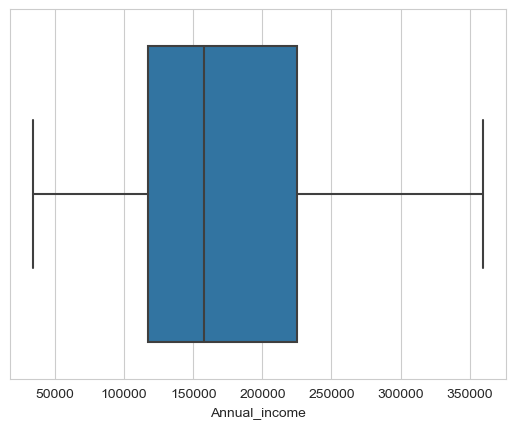

In [94]:
# Box plot of Annual_income after removing outliers

sns.boxplot(data=ccdata_outliers, x='Annual_income')
plt.show()

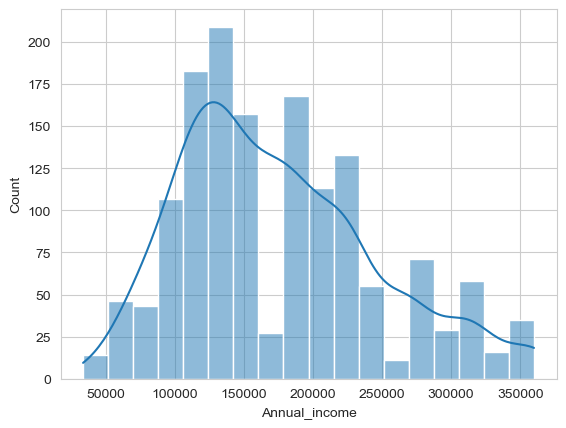

In [95]:
sns.histplot(data=ccdata_outliers, x='Annual_income', kde=True)
plt.show()

In [96]:
ccdata_outliers['Annual_income'].skew()

0.643112122071323

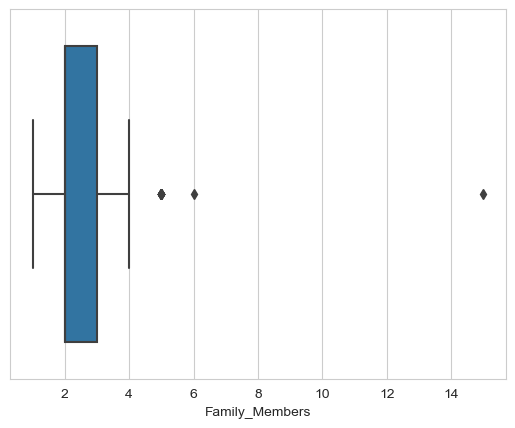

In [97]:
sns.boxplot(data=ccdata_outliers, x='Family_Members')
plt.show()

In [98]:
ccdata_outliers=ccdata_outliers[ccdata_outliers['Family_Members']<14]

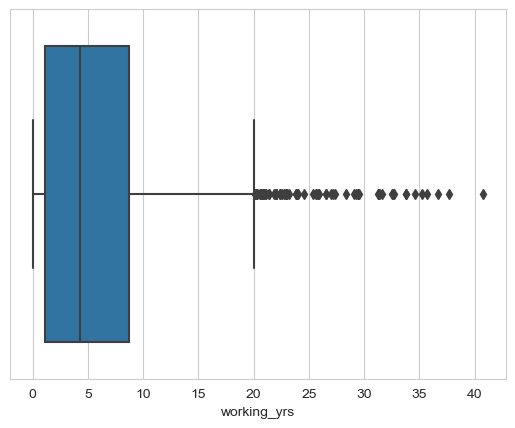

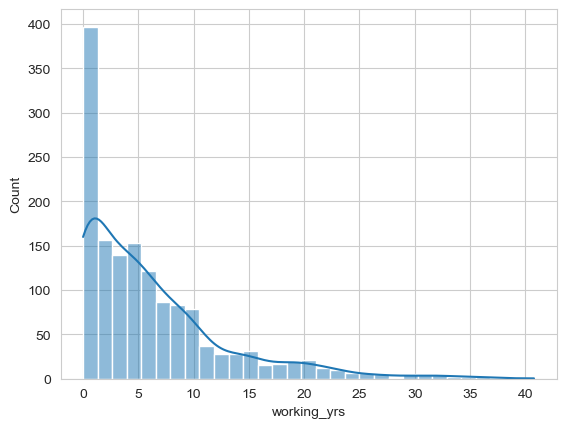

In [99]:
sns.boxplot(data=ccdata_outliers, x='working_yrs')
plt.show()

sns.histplot(data=ccdata_outliers, x='working_yrs', kde=True)
plt.show()


In [100]:
Q1=np.percentile(ccdata_outliers['working_yrs'],25,interpolation='midpoint')
Q2=np.percentile(ccdata_outliers['working_yrs'],50,interpolation='midpoint')
Q3=np.percentile(ccdata_outliers['working_yrs'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [101]:
up_limit

20.015753424657536

In [102]:
ccdata_outliers[ccdata_outliers['working_yrs']>up_limit]

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,Status,age,working_yrs
40,F,Y,N,2,270000.0,State servant,Higher education,Married,House / apartment,1,1,1,0,4,1,43.980822,20.189041
62,F,N,N,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,4,1,45.509589,22.928767
63,F,N,N,2,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,4,1,45.509589,22.928767
104,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,1,51.975342,22.358904
121,F,N,Y,4,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,6,1,47.857534,20.309589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,F,Y,Y,1,90000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,0,0,3,0,48.032877,22.038356
1428,F,N,N,0,292500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,2,0,51.227397,29.473973
1439,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,0,48.775342,29.484932
1445,F,Y,N,0,216000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,0,1,0,54.150685,27.191781


In [103]:
ccdata_outliers['new_working_yrs']=ccdata_outliers['working_yrs'].clip(lower=low_limit, upper=up_limit)

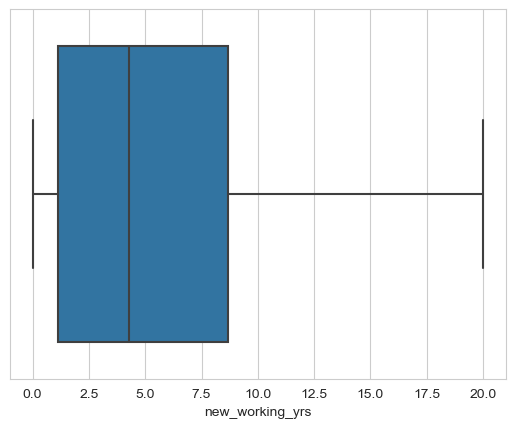

In [104]:
sns.boxplot(data=ccdata_outliers, x='new_working_yrs')
plt.show()

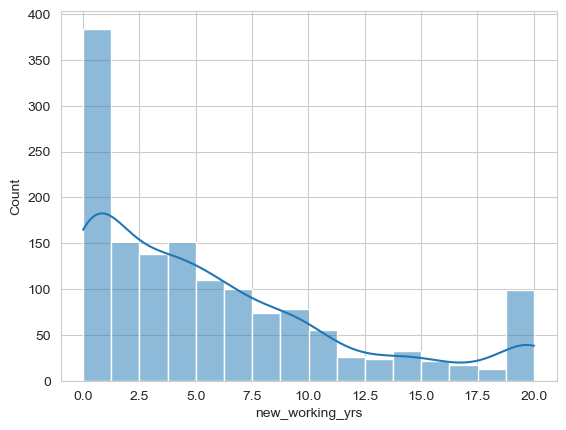

In [105]:
sns.histplot(data=ccdata_outliers, x='new_working_yrs', kde=True)
plt.show()

In [106]:
ccdata_outliers['working_yrs'].mean()

6.107484990985297

In [107]:
ccdata_outliers['new_working_yrs'].mean()

5.81639095927585

In [108]:
# If we drop the outliers which are greater than up_limit then mean is calculated as

ccdata_outliers[ccdata_outliers['working_yrs']<up_limit]['working_yrs'].mean()

5.0230168387172744

So by comparing mean values, the mean value for new_working_yrs is matched closely to working_yrs

##### Handling Skewness

In [109]:
ccdata_outliers['new_working_yrs'].skew()

1.0927732809632225

In [110]:
ccdata_outliers['sqrt_new_working_yrs']=np.sqrt(ccdata_outliers['new_working_yrs'])

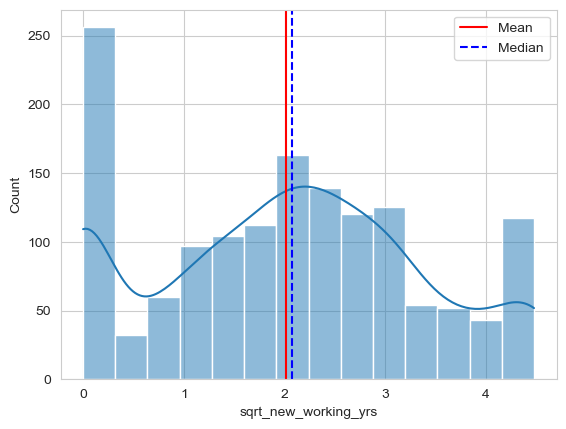

In [111]:
sns.histplot(data=ccdata_outliers, x='sqrt_new_working_yrs', kde=True)
plt.axvline(x=ccdata_outliers.sqrt_new_working_yrs.mean(),color="red",label="Mean")
plt.axvline(x=ccdata_outliers.sqrt_new_working_yrs.median(),color="blue",label="Median", ls="--")
plt.legend()
plt.show()

In [112]:
ccdata_outliers['sqrt_new_working_yrs'].skew()

0.04655116984454907

In [113]:
ccdata_no_outliers=ccdata_outliers.copy()

In [114]:
ccdata_no_outliers.drop(columns=['working_yrs','new_working_yrs'], inplace=True)

In [115]:
ccdata_no_outliers.rename(columns={'sqrt_new_working_yrs':'working_yrs'}, inplace=True)

In [116]:
ccdata_no_outliers.rename(columns={'working_yrs':'sqrt_working_yrs'}, inplace=True)

In [117]:
ccdata_no_outliers.head()

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,Status,age,sqrt_working_yrs
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,1,51.430137,0.000000
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.267075
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,40.219428,1.267075
3,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.267075
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,1,37.142466,1.267075


## Feature Encoding

In [118]:
ccdata_encoding=ccdata_no_outliers.copy()

In [119]:
features=['Mobile_phone', 'Work_Phone', 'Phone', 'Email_id']

for fea in features:
    ccdata_encoding[fea]=ccdata_encoding[fea].map({1:'Y',0:'N'})

In [120]:
ccdata_encoding.columns

Index(['Gender', 'Car_Owner', 'Property_owner', 'Children', 'Annual_income',
       'Income_type', 'Education', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'Email_id', 'Family_Members',
       'Status', 'age', 'sqrt_working_yrs'],
      dtype='object')

In [121]:
ccdata_encoding_catfea=ccdata_encoding[['Gender', 'Car_Owner', 'Property_owner',
       'Income_type', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'Email_id']]

In [122]:
ccdata_encoding_catfea.head(3)

,Gender,Car_Owner,Property_owner,Income_type,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_id
0,M,Y,Y,Pensioner,Married,House / apartment,Y,N,N,N
1,F,Y,N,Commercial associate,Married,House / apartment,Y,Y,Y,N
2,F,Y,N,Commercial associate,Married,House / apartment,Y,Y,Y,N


In [123]:
ccdata_encoding_rem_fea=ccdata_encoding[['Children', 'Annual_income','Education','Family_Members',
                                         'Status', 'age', 'sqrt_working_yrs']]

In [124]:
ccdata_encoding_rem_fea.head(3)

,Children,Annual_income,Education,Family_Members,Status,age,sqrt_working_yrs
0,0,180000.0,Higher education,2,1,51.430137,0.000000
1,0,315000.0,Higher education,2,1,37.142466,1.267075
2,0,315000.0,Higher education,2,1,40.219428,1.267075


In [125]:
# Performing One hot encoding on categorical features except for Education

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(ccdata_encoding_catfea)

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [126]:
ohe.get_feature_names_out()

array(['Gender_F', 'Gender_M', 'Car_Owner_N', 'Car_Owner_Y',
       'Property_owner_N', 'Property_owner_Y',
       'Income_type_Commercial associate', 'Income_type_Pensioner',
       'Income_type_State servant', 'Income_type_Working',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment',
       'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Mobile_phone_Y', 'Work_Phone_N',
       'Work_Phone_Y', 'Phone_N', 'Phone_Y', 'Email_id_N', 'Email_id_Y'],
      dtype=object)

In [127]:
ccdata_encoding_catfea_ohe=pd.DataFrame(ohe.transform(ccdata_encoding_catfea), columns=ohe.get_feature_names_out())

In [128]:
ccdata_encoding_catfea_ohe.head(3)

,Gender_F,Gender_M,Car_Owner_N,Car_Owner_Y,Property_owner_N,Property_owner_Y,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Working,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Mobile_phone_Y,Work_Phone_N,Work_Phone_Y,Phone_N,Phone_Y,Email_id_N,Email_id_Y
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [129]:
ccdata_encoding_catfea_ohe.shape

(1474, 28)

In [130]:
ccdata_encoding_catfea_ohe.index

RangeIndex(start=0, stop=1474, step=1)

In [131]:
ccdata_encoding_rem_fea['Education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [132]:
# The order of Education is:
# lower secondary
# secondary special
# incomplete higher
# higher
# academic


In [133]:
# Performing Ordinal Encoding on Education

from sklearn.preprocessing import OrdinalEncoder
columns_order=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education', 'Academic degree']
encoder_oe=OrdinalEncoder(categories=[columns_order])
ccdata_encoding_rem_fea['Education']=encoder_oe.fit_transform(ccdata_encoding_rem_fea[['Education']])

In [134]:
ccdata_encoding_rem_fea.head(3)

,Children,Annual_income,Education,Family_Members,Status,age,sqrt_working_yrs
0,0,180000.0,3.0,2,1,51.430137,0.000000
1,0,315000.0,3.0,2,1,37.142466,1.267075
2,0,315000.0,3.0,2,1,40.219428,1.267075


In [135]:
ccdata_encoding_rem_fea.shape

(1474, 7)

In [136]:
ccdata_encoding_rem_fea.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,   11,   12,
            ...
            1537, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547],
           dtype='int64', length=1474)

In [137]:
ccdata_encoding_rem_fea.reset_index(inplace=True)

In [138]:
ccdata_encoding_rem_fea.index

RangeIndex(start=0, stop=1474, step=1)

In [139]:
# Merging the two datasets

ccdata_after_encoding=pd.concat([ccdata_encoding_catfea_ohe,ccdata_encoding_rem_fea], axis=1)

In [140]:
# ccdata_after_encoding.drop(columns=['index','Mobile_phone_Y'], inplace=True) #---> because mobile phone feature does not show any variance

In [141]:
ccdata_after_encoding.head()

,Gender_F,Gender_M,Car_Owner_N,Car_Owner_Y,Property_owner_N,Property_owner_Y,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Working,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Mobile_phone_Y,Work_Phone_N,Work_Phone_Y,Phone_N,Phone_Y,Email_id_N,Email_id_Y,index,Children,Annual_income,Education,Family_Members,Status,age,sqrt_working_yrs
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,180000.0,3.0,2,1,51.430137,0.000000
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1,0,315000.0,3.0,2,1,37.142466,1.267075
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,2,0,315000.0,3.0,2,1,40.219428,1.267075
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3,0,234600.0,3.0,2,1,37.142466,1.267075
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4,0,315000.0,3.0,2,1,37.142466,1.267075


In [142]:
ccdata_after_encoding.shape

(1474, 36)

#### Feature Selection

Dropping the below columns:
    1.Mobile_phone_Y  ----> because this column has zero variation in the data
    2.Children   ----> Since children and Family_Members are correlated with each other, dropping the children's column

In [143]:
X=ccdata_after_encoding.drop(columns=['Status','Mobile_phone_Y','Children','index']) 
y=ccdata_after_encoding['Status']

In [144]:
X.shape

(1474, 32)

In [145]:
# pip install -U imbalanced-learn

In [146]:
## Handling Imbalanced Dataset

from imblearn.over_sampling import SMOTE

oversample=SMOTE()
X, y = oversample.fit_resample(X, y)

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=11)

### Feature Scaling

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [149]:
X_train.columns

Index(['Gender_F', 'Gender_M', 'Car_Owner_N', 'Car_Owner_Y',
       'Property_owner_N', 'Property_owner_Y',
       'Income_type_Commercial associate', 'Income_type_Pensioner',
       'Income_type_State servant', 'Income_type_Working',
       'Marital_status_Civil marriage', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_Co-op apartment',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Work_Phone_N', 'Work_Phone_Y', 'Phone_N',
       'Phone_Y', 'Email_id_N', 'Email_id_Y', 'Annual_income', 'Education',
       'Family_Members', 'age', 'sqrt_working_yrs'],
      dtype='object')

#### Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [151]:
y_train_predict=log_model.predict(X_train_scaled)
y_train_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

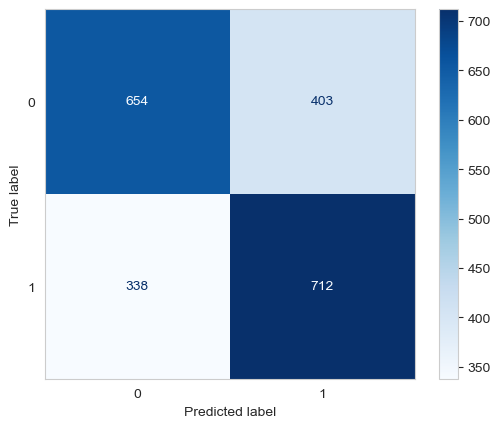

In [152]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

conf_matrix_log=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues")
plt.grid(visible=None)
plt.show()

In [153]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      1057
           1       0.64      0.68      0.66      1050

    accuracy                           0.65      2107
   macro avg       0.65      0.65      0.65      2107
weighted avg       0.65      0.65      0.65      2107



In [154]:
from sklearn.metrics import roc_curve, roc_auc_score,RocCurveDisplay

roc=roc_curve(y_train, y_train_predict)  #---> gives 3 values, fpr, tpr, threshold
roc

(array([0.        , 0.38126774, 1.        ]),
 array([0.        , 0.67809524, 1.        ]),
 array([2, 1, 0], dtype=int64))

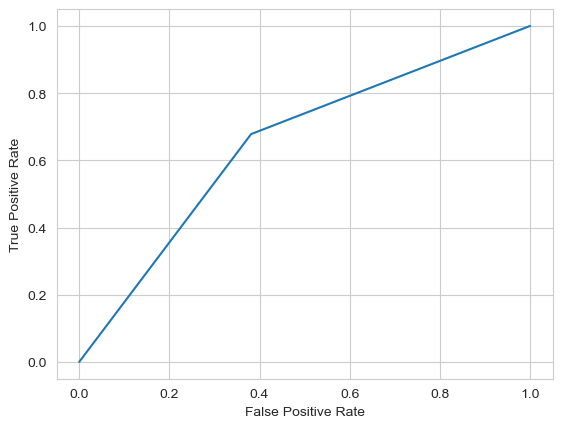

In [155]:
RocCurveDisplay(fpr=roc[0],tpr=roc[1]).plot()

In [156]:
roc_auc_score(y_train, y_train_predict)

0.6484137496058026

#### KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [158]:
y_train_predict=knn_model.predict(X_train_scaled)
y_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

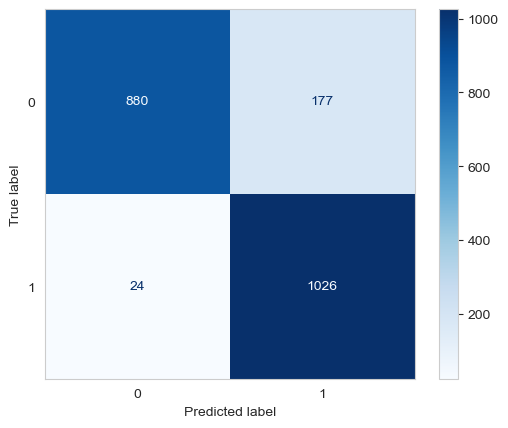

In [159]:
knn_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues")
plt.grid(visible=None)
plt.show()

In [160]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1057
           1       0.85      0.98      0.91      1050

    accuracy                           0.90      2107
   macro avg       0.91      0.90      0.90      2107
weighted avg       0.91      0.90      0.90      2107



In [161]:
fpr,tpr,th=roc_curve(y_train, y_train_predict)

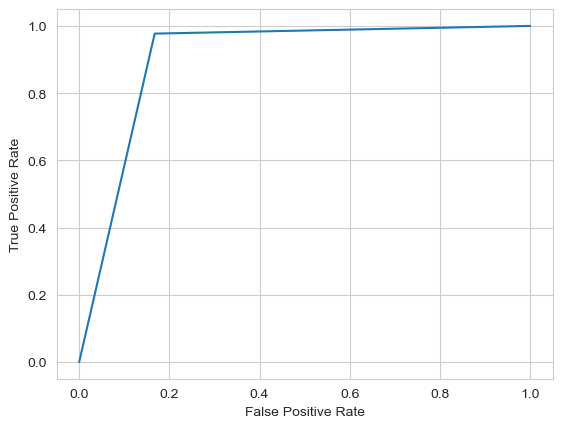

In [162]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [163]:
roc_auc_score(y_train, y_train_predict)

0.9048438978240303

#### Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [165]:
y_train_predict=dt_model.predict(X_train_scaled)
y_train_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

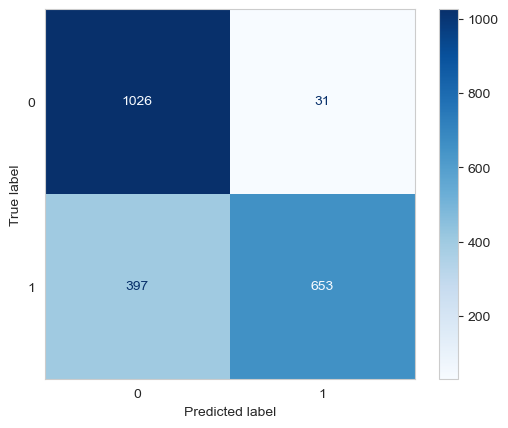

In [166]:
dt_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues")
plt.grid(visible=None)
plt.show()

In [167]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83      1057
           1       0.95      0.62      0.75      1050

    accuracy                           0.80      2107
   macro avg       0.84      0.80      0.79      2107
weighted avg       0.84      0.80      0.79      2107



In [168]:
fpr_dt,tpr_dt,th=roc_curve(y_train, y_train_predict)

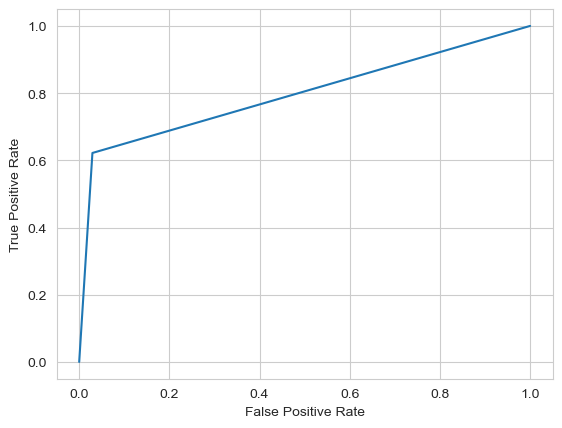

In [169]:
RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt).plot()

In [170]:
roc_auc_score(y_train, y_train_predict)

0.7962882371491643

In [171]:
# from sklearn.model_selection import GridSearchCV
# grid_parameters={'criterion':['entropy', 'gini'],'max_depth':[3,4,5,6,7]}
# grid=GridSearchCV(DecisionTreeClassifier(),grid_parameters)
# grid.fit(X_train_scaled, y_train)
# print(grid.best_params_)

#### SVM

In [172]:
from sklearn import svm

svm_model=svm.SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC()

In [173]:
y_train_predict=svm_model.predict(X_train_scaled)
y_train_predict

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

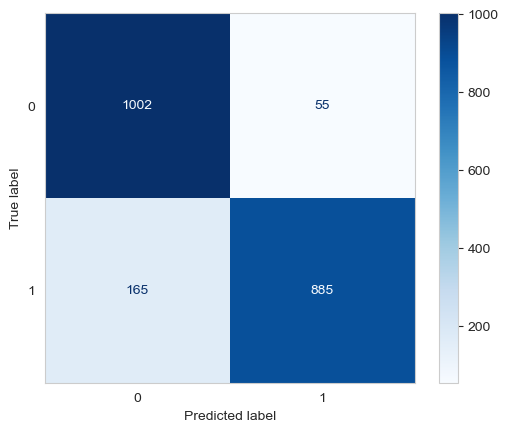

In [174]:
svm_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues")
plt.grid(visible=None)
plt.show()

In [175]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1057
           1       0.94      0.84      0.89      1050

    accuracy                           0.90      2107
   macro avg       0.90      0.90      0.90      2107
weighted avg       0.90      0.90      0.90      2107



In [176]:
fpr_svm,tpr_svm,th=roc_curve(y_train, y_train_predict)

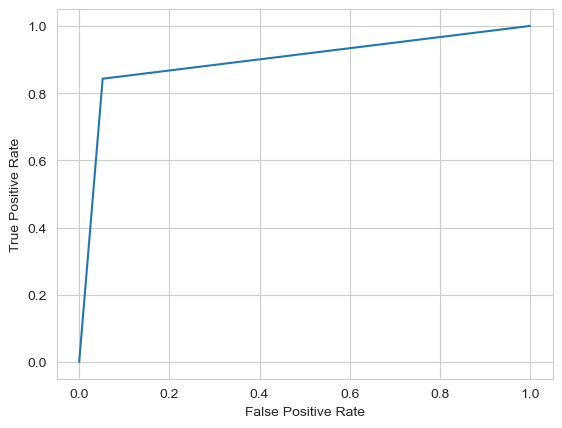

In [177]:
RocCurveDisplay(fpr=fpr_svm, tpr=tpr_svm).plot()

In [178]:
roc_auc_score(y_train, y_train_predict)

0.895411542100284

#### ROC-AUC Curve for all models

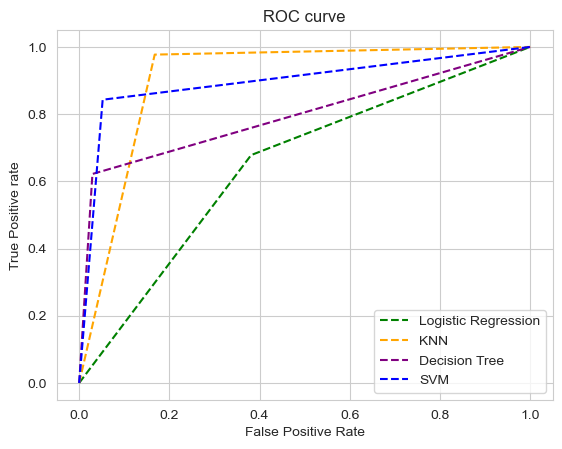

In [179]:
plt.plot(roc[0],roc[1],linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr,tpr,linestyle='--',color='orange', label='KNN')
plt.plot(fpr_dt,tpr_dt,linestyle='--',color='purple', label='Decision Tree')
plt.plot(fpr_svm,tpr_svm,linestyle='--',color='blue', label='SVM')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

#### Based on ROC curve the best fit model is SVM

##### HyperParameter tuning of SVM

In [180]:
from sklearn.model_selection import GridSearchCV
grid_parameters={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(svm.SVC(),grid_parameters)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


#### For these parameters, again fitting the model

In [181]:
svm_model_new=svm.SVC(C=10,gamma=1,kernel='rbf')
svm_model_new.fit(X_train_scaled, y_train)

SVC(C=10, gamma=1)

In [182]:
y_train_predict=svm_model_new.predict(X_train_scaled)
y_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

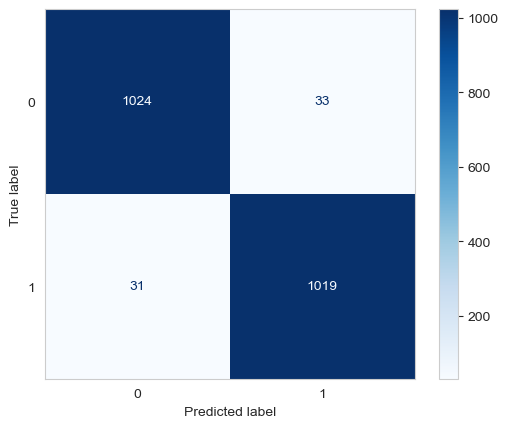

In [183]:
svm_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap='Blues')
plt.grid(visible=None)
plt.show()

In [184]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1057
           1       0.97      0.97      0.97      1050

    accuracy                           0.97      2107
   macro avg       0.97      0.97      0.97      2107
weighted avg       0.97      0.97      0.97      2107



In [185]:
roc_auc_score(y_train, y_train_predict)

0.9696278776411227

#### Testing the model

In [186]:
y_test_predict=svm_model_new.predict(X_test_scaled)
y_test_predict

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

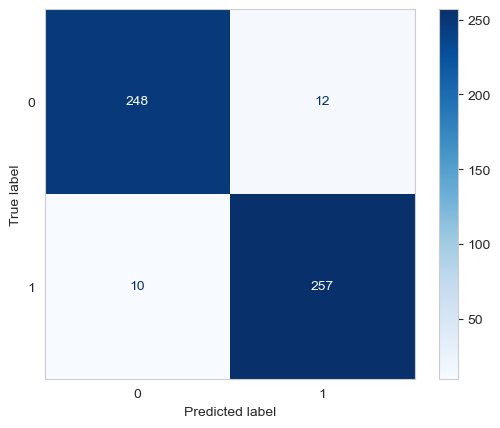

In [187]:
svm_conf_matrix=confusion_matrix(y_test, y_test_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict,cmap='Blues')
plt.grid(visible=None)
plt.show()

In [188]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       260
           1       0.96      0.96      0.96       267

    accuracy                           0.96       527
   macro avg       0.96      0.96      0.96       527
weighted avg       0.96      0.96      0.96       527



In [189]:
roc_auc_score(y_test, y_test_predict)

0.9581964851627772